In [3]:
import pandas as pd
import numpy as np

In [5]:
import os
from subprocess import check_output
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [8]:
data = pd.read_csv("trainset.csv")


In [11]:
print(data.head())
print(data.shape)
print(data.columns)


         Date        Open        High         Low       Close   Adj Close  \
0  2013-01-02  357.385559  361.151062  355.959839  359.288177  359.288177   
1  2013-01-03  360.122742  363.600128  358.031342  359.496826  359.496826   
2  2013-01-04  362.313507  368.339294  361.488861  366.600616  366.600616   
3  2013-01-07  365.348755  367.301056  362.929504  365.001007  365.001007   
4  2013-01-08  365.393463  365.771027  359.874359  364.280701  364.280701   

    Volume  
0  5115500  
1  4666500  
2  5562800  
3  3332900  
4  3373900  
(1259, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Text(0.5, 1.0, 'Tesla Close Price')

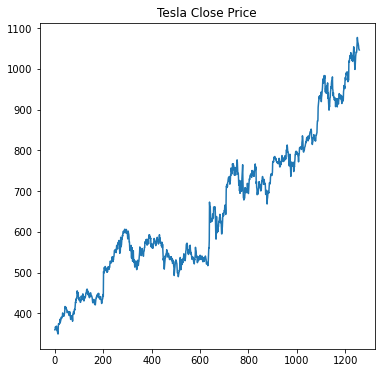

In [23]:
plt.figure(figsize=(6,6))
plt.plot(data['Close'])
plt.title("Tesla Close Price")


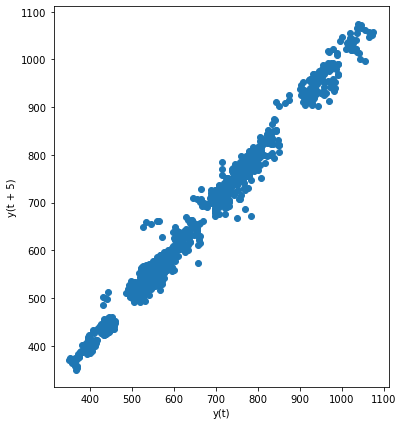

In [25]:
plt.figure(figsize=(6,7))
lag_plot(data['Open'], lag=5)
